In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thalassemia/alpha2-research_pilot.xlsx


In [2]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 1.1 MB/s 


In [3]:
df = pd.read_excel("../input/thalassemia/alpha2-research_pilot.xlsx", header=0)

In [4]:
df_clean = df.dropna(axis=0)

In [5]:
df_clean.shape

(242, 11)

In [6]:
df_clean.isna().any()

Study code                 False
Age                        False
Sex 0: male / 1: female    False
Hb                         False
Hct                        False
MCV                        False
MCH                        False
MCHC                       False
RDW                        False
RBC count                  False
Diagnosis                  False
dtype: bool

In [7]:
df_clean['Diagnosis'].unique()

array([13, 12, 11, 15])

In [8]:
df_clean_remove = df_clean[df_clean['Diagnosis'] != 15]

In [9]:
df_clean_remove['Diagnosis'].unique()

array([13, 12, 11])

In [10]:
df_clean_remove.describe()

,Study code,Age,Sex 0: male / 1: female,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count,Diagnosis
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,129.680180,30.797297,0.509009,12.875225,39.468604,74.856306,24.503649,32.609459,15.448198,5.349234,11.792793
std,75.852986,6.931428,0.501049,1.709428,4.873935,10.308180,4.160462,1.485480,3.113170,0.853181,0.680925
min,1.000000,17.000000,0.000000,7.500000,26.600000,48.800000,14.700000,27.000000,9.700000,3.670000,11.000000
25%,64.250000,26.000000,0.000000,11.700000,35.950000,66.350000,20.900000,31.600000,13.200000,4.760000,11.000000
50%,129.500000,30.000000,1.000000,13.000000,39.500000,72.950000,23.350000,32.700000,14.850000,5.265000,12.000000
75%,194.750000,35.750000,1.000000,14.100000,43.300000,83.975000,28.275000,33.675000,17.000000,5.927500,12.000000
max,258.000000,53.000000,1.000000,17.400000,50.100000,96.400000,33.200000,36.200000,26.800000,7.520000,13.000000


In [11]:
df_clean_remove

,Study code,Age,Sex 0: male / 1: female,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count,Diagnosis
0,1,36,1,10.5,32.4,87.7,28.5,32.4,14.4,3.69,13
1,2,40,0,13.7,42.7,64.6,20.7,32.1,17.8,6.61,12
2,3,18,1,12.9,40.6,65.9,20.9,31.8,17.2,6.16,12
3,4,19,0,13.4,41.6,79.8,25.7,32.2,13.2,5.21,11
4,5,35,1,12.8,38.7,85.6,28.3,33.1,13.2,4.52,11
...,...,...,...,...,...,...,...,...,...,...,...
253,254,26,0,14.4,41.8,86.7,29.9,34.4,11.3,4.82,11
254,255,43,1,10.9,34.3,62.6,19.9,31.8,17.9,5.48,12
255,256,49,0,13.8,40.5,90.6,30.9,34.1,13.7,4.47,11
256,257,31,1,11.6,34.9,93.9,31.3,33.5,13.6,3.71,11


In [12]:
df_clean_remove.groupby('Diagnosis')['Diagnosis'].count()

Diagnosis
11     79
12    110
13     33
Name: Diagnosis, dtype: int64

In [13]:
Xo = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).values
yo = df_clean_remove['Diagnosis'].values

In [14]:
Xo.shape

(222, 9)

In [15]:
labelname = ['Normal','Mediam','Critical']
yo[yo==11] = 0
yo[yo==12] = 1
yo[yo==13] = 2

In [16]:
yo

array([2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1,
       0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1,
       0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 1])

Split train test

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y, yt = train_test_split(Xo, yo, test_size=0.2, random_state=0)

HOLD OUT

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y, yv = train_test_split(X_train, y, test_size=0.2, random_state=0)

In [19]:
X_train.shape

(141, 9)

In [20]:
X_val.shape

(36, 9)

In [21]:
X_test.shape

(45, 9)

------------------------------

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y)

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(X_res)
X_train_norm = scl.transform(X_res)
X_val_norm = scl.transform(X_val)
X_test_norm = scl.transform(X_test)
y = y_res

# Save ตัว Normalization ลง joblib - scaler model

scl = MinMaxScaler()

In [23]:
import joblib
joblib.dump(scl, "thalscl.sav")

['thalscl.sav']

-------------------

In [24]:
y # ,ีปัญหา

array([1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
num_label = len(np.unique(y)) 
y_multi = (np.arange(num_label) == y[:,None]).astype(np.float32)
yv_multi = (np.arange(num_label) == yv[:,None]).astype(np.float32)
yt_multi = (np.arange(num_label) == yt[:,None]).astype(np.float32)

In [26]:
yv_multi  # แปลงละ ปัญหาหายละ

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [27]:
sample_size, input_size = X_train_norm.shape

import tensorflow as tf
def create_model(input_size, num_label):
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(8, activation='relu', input_shape=(input_size,)),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(2, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(num_label, activation='softmax')    
    ])
    return model

In [28]:
import tensorflow as tf
def create_model(input_size, num_label):
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(16, activation='relu', input_shape=(input_size,)),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(2, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(num_label, activation='softmax')    
    ])
    return model

2021-09-29 11:02:42.617939: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-29 11:02:42.618105: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


โมเดล อย่าลืมเปลี่ยน loss = "" ด้วย

In [29]:
model = create_model(input_size, num_label)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_acc = list()
val_acc = list()
for i in range(0,200):
  history = model.fit(X_train_norm, y_multi, epochs= 1, batch_size = sample_size, validation_data= (X_val, yv_multi))
  tmp_avg = np.mean(history.history['loss'])
  tmp_avg_val = np.mean(history.history['val_loss'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

2021-09-29 11:02:47.226936: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-29 11:02:47.230067: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-29 11:02:47.230100: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-29 11:02:47.230125: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dd70816ac022): /proc/driver/nvidia/version does not exist
2021-09-29 11:02:47.230448: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

1/1 [==============================] - 0s 146ms/step - loss: 0.8340 - accuracy: 0.6931 - val_loss: 124.1728 - val_accuracy: 0.1944


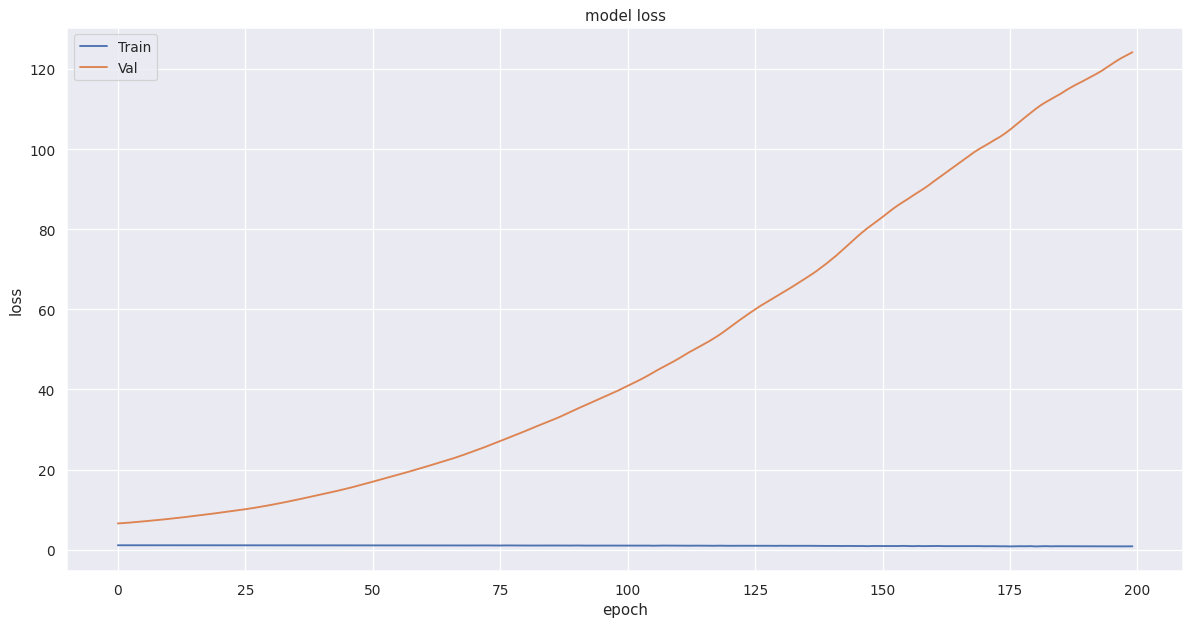

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
# OVER FIT อย่างเห็นได้ชัด เละตั้งแต่ต้น ต้องกราฟค่อยๆลงมาคู่กัน แล้วแยกในจุดที่กำลังจะover fit ถึงจะดี

In [31]:
yp = model.predict(X_test_norm)
yp = np.argmax(yp, 1)
sum(yp == yt)/len(yt)

0.7111111111111111

In [32]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(model.predict, X_test_norm)
shap_values = explainer.shap_values(X_test_norm)

  0%|          | 0/45 [00:00<?, ?it/s]

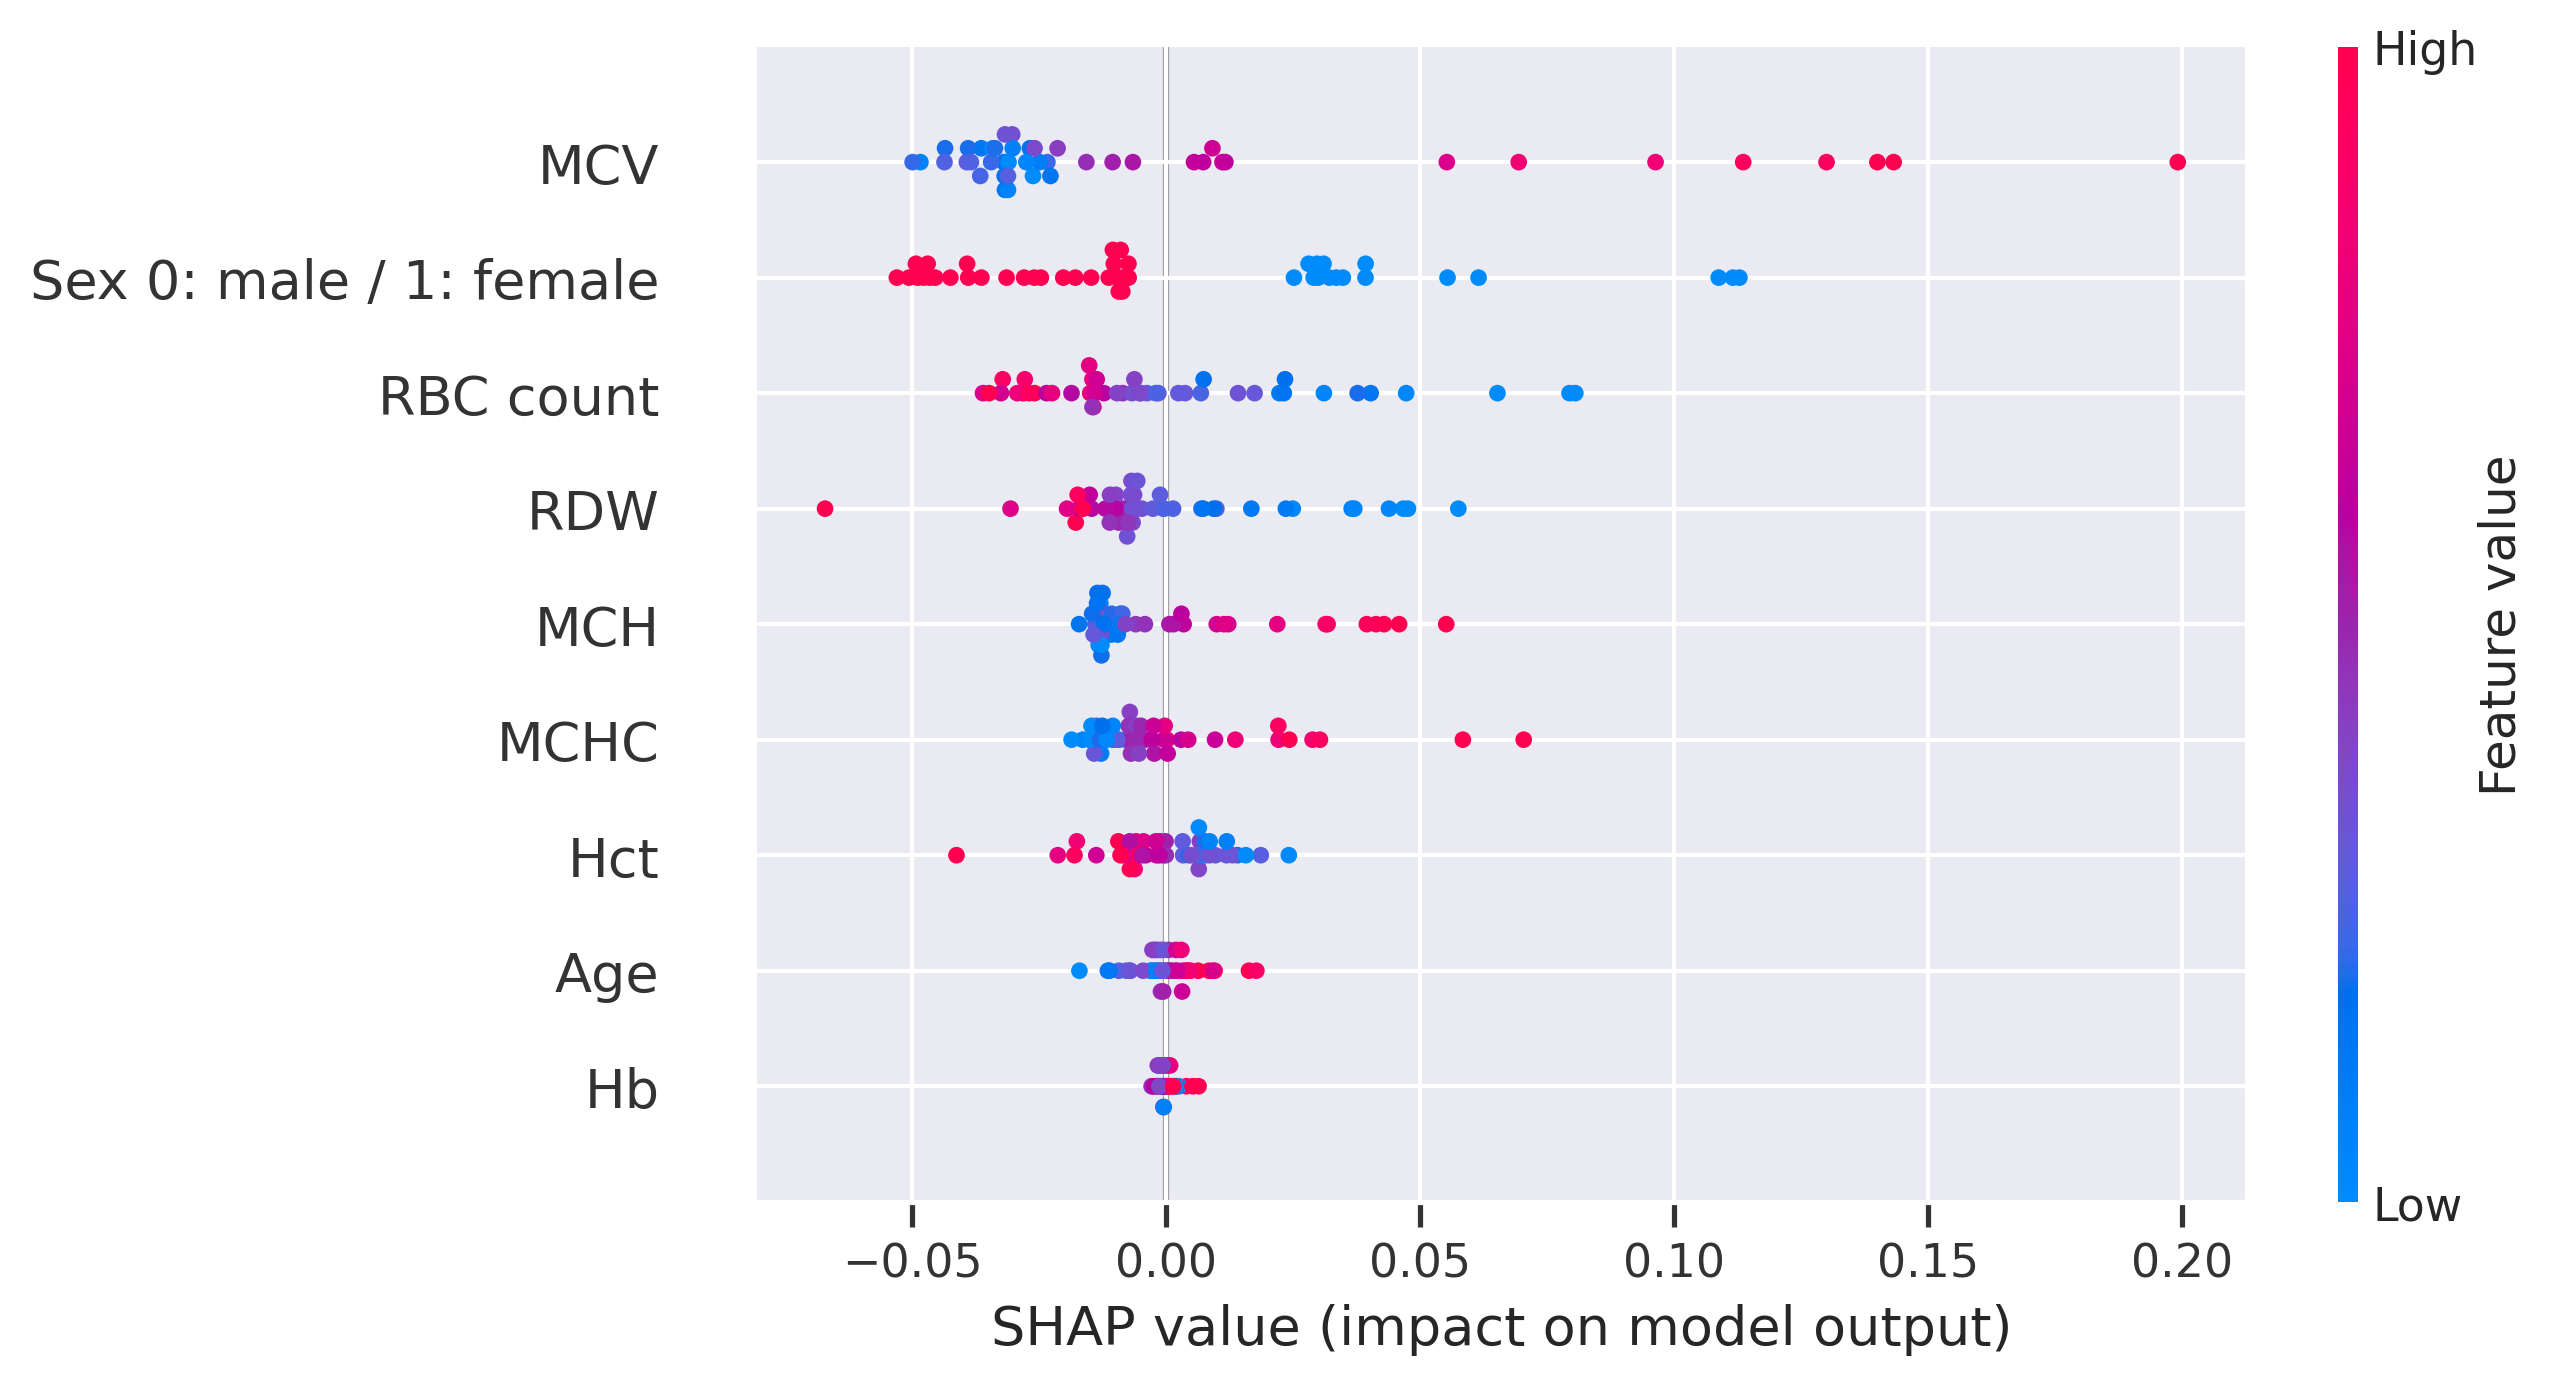

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values[0], X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=['Normal','Carrier','Hard-Carrier'], show=False, )
ax = plt.gca()
fig = plt.gcf()
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

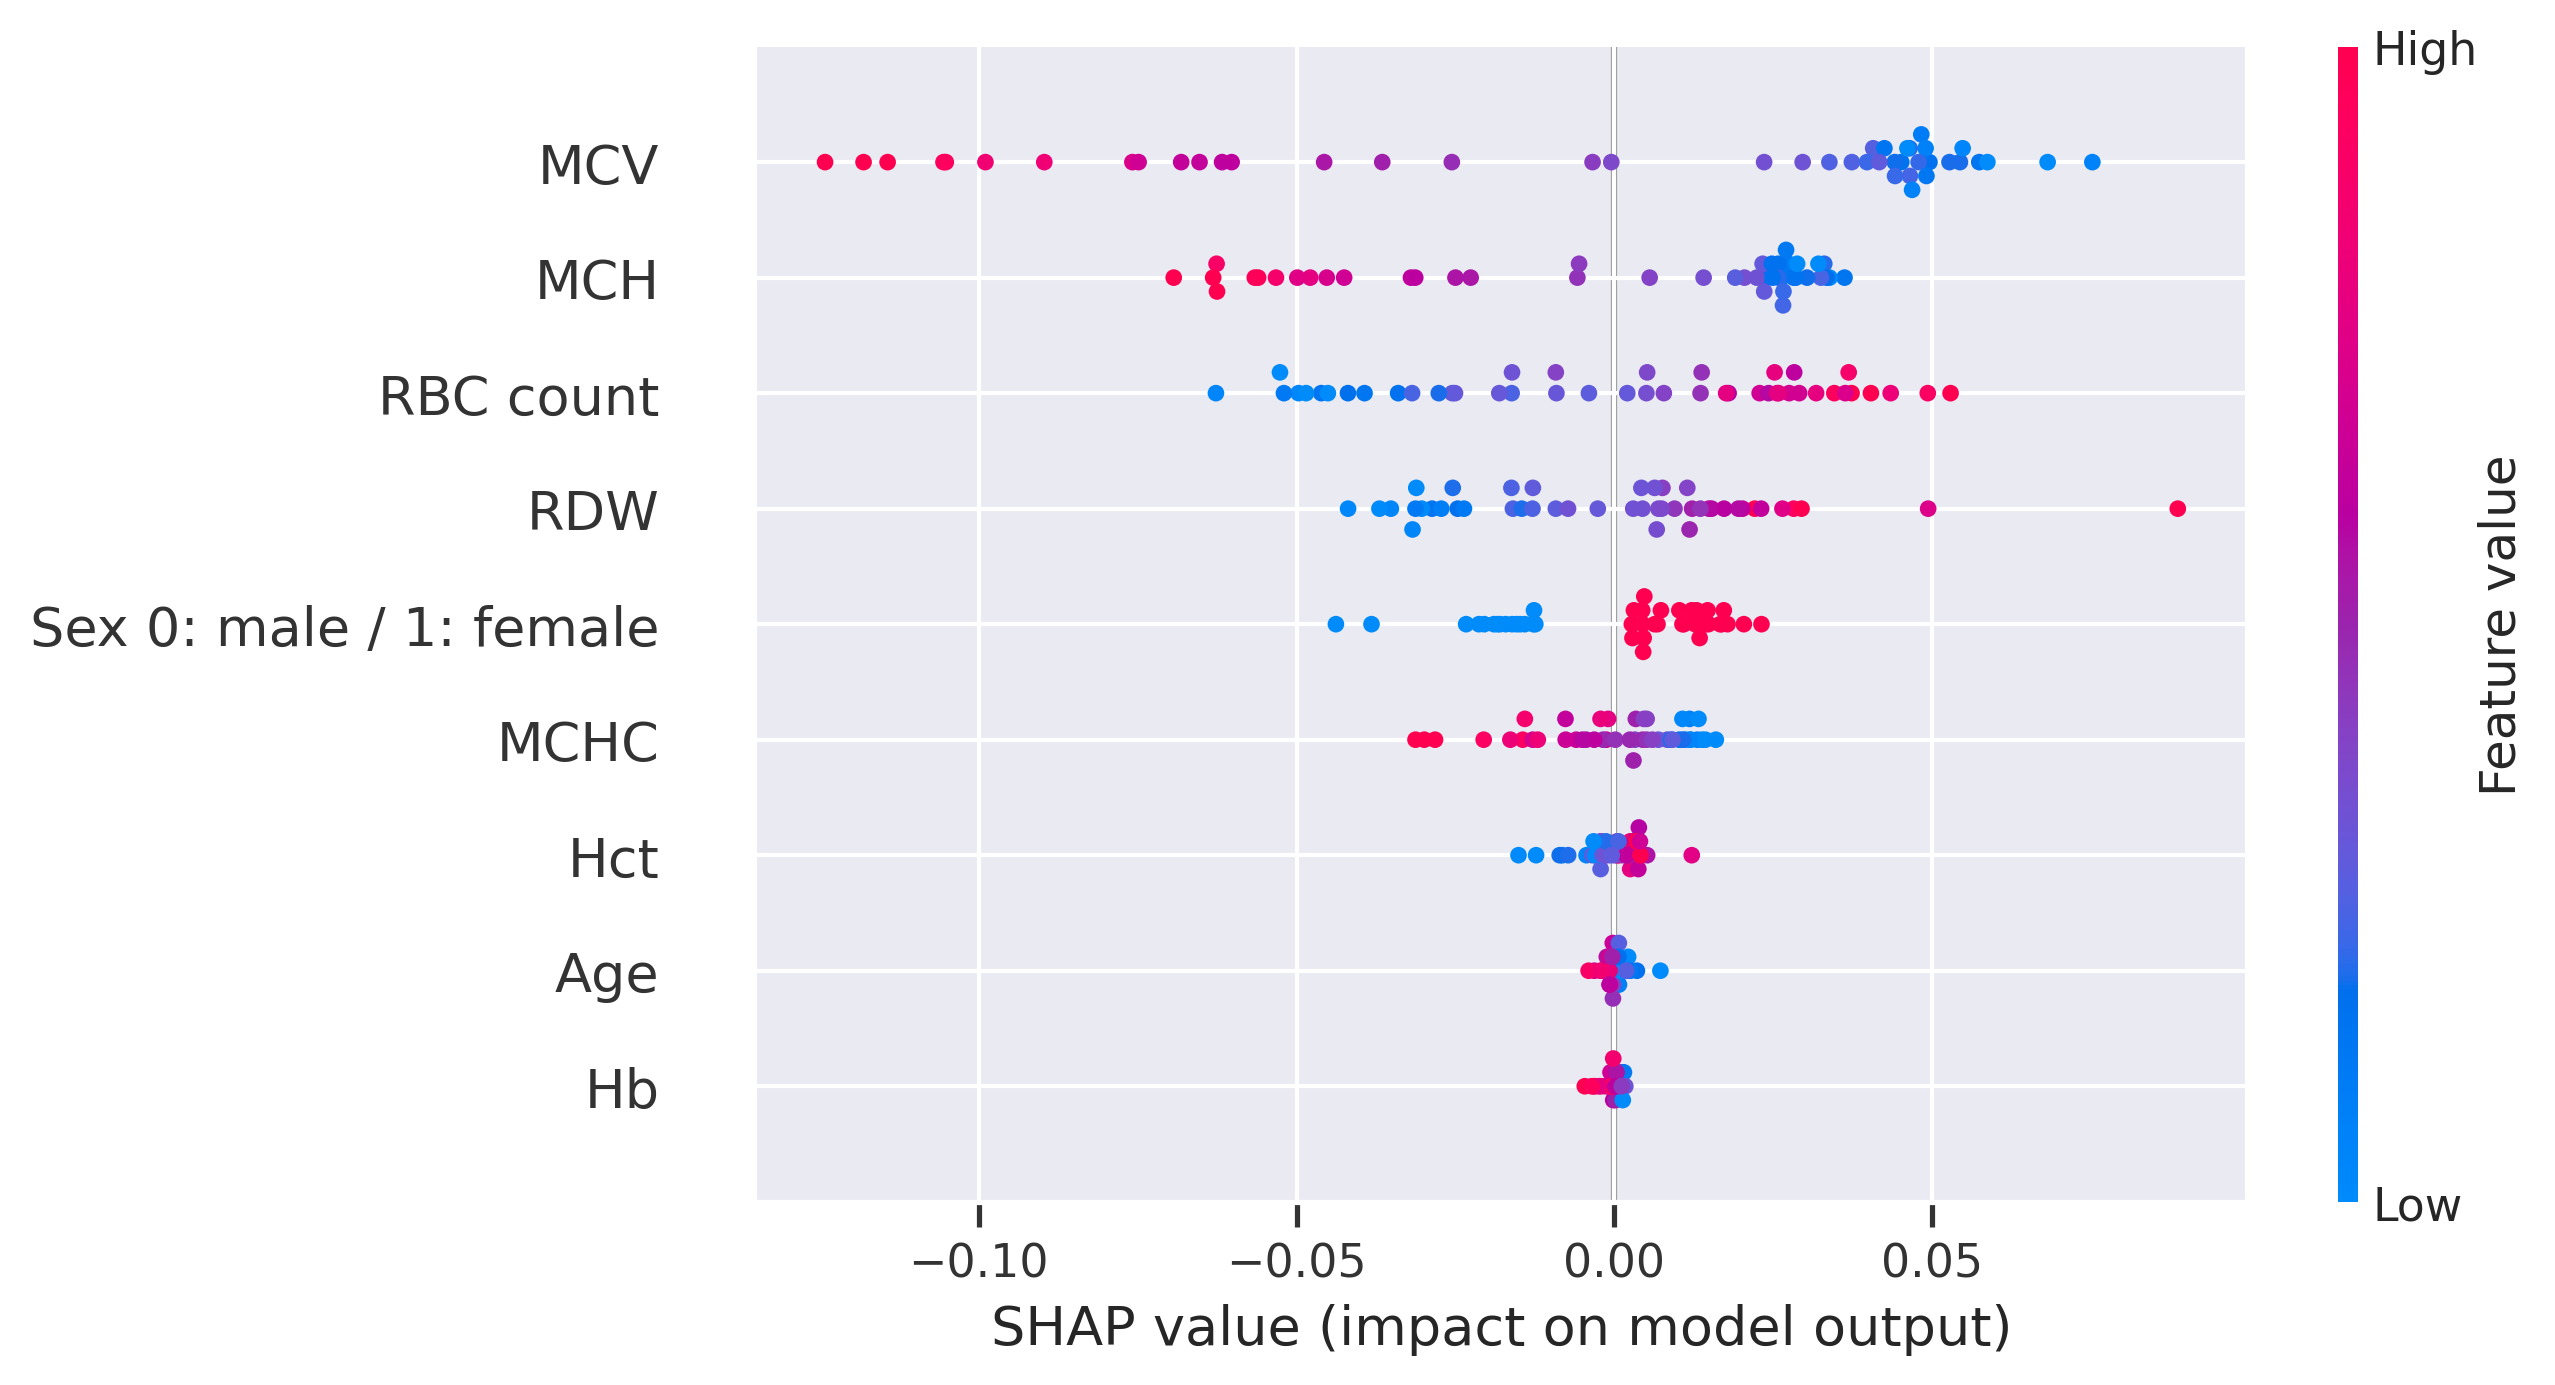

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values[1], X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=['Normal','Carrier','Hard-Carrier'], show=False, )
ax = plt.gca()
fig = plt.gcf()
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

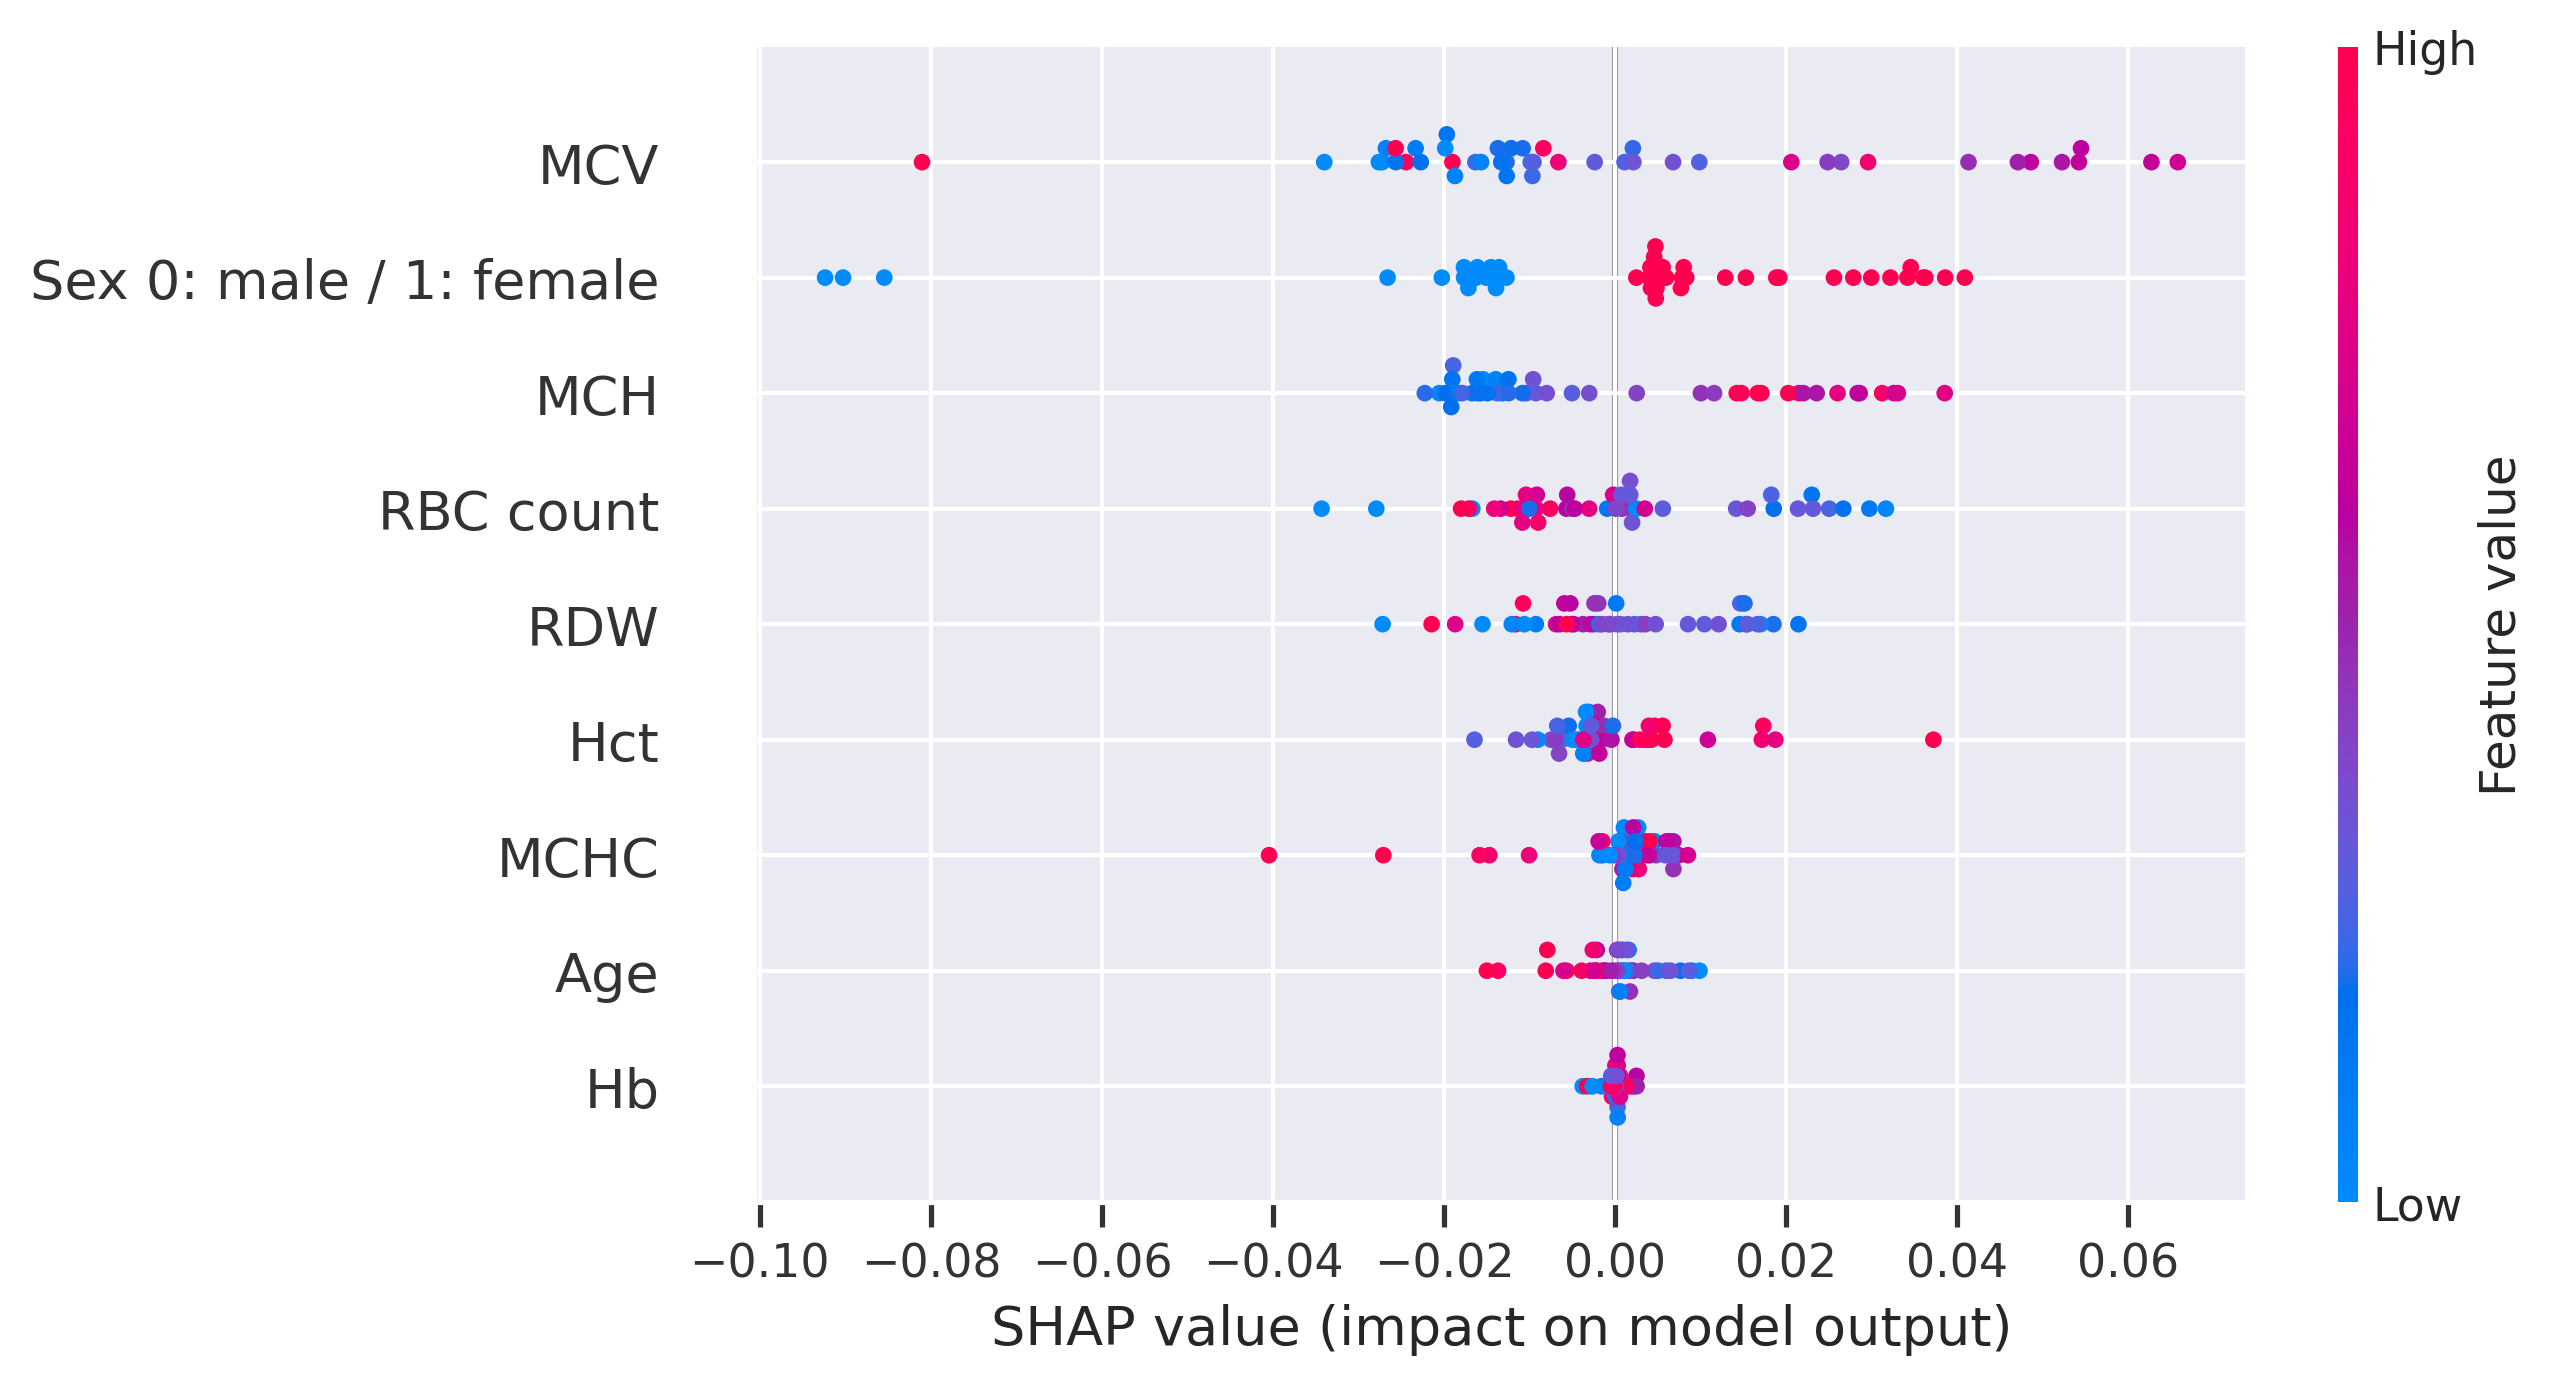

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values[2], X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=['Normal','Carrier','Hard-Carrier'], show=False, )
ax = plt.gca()
fig = plt.gcf()
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

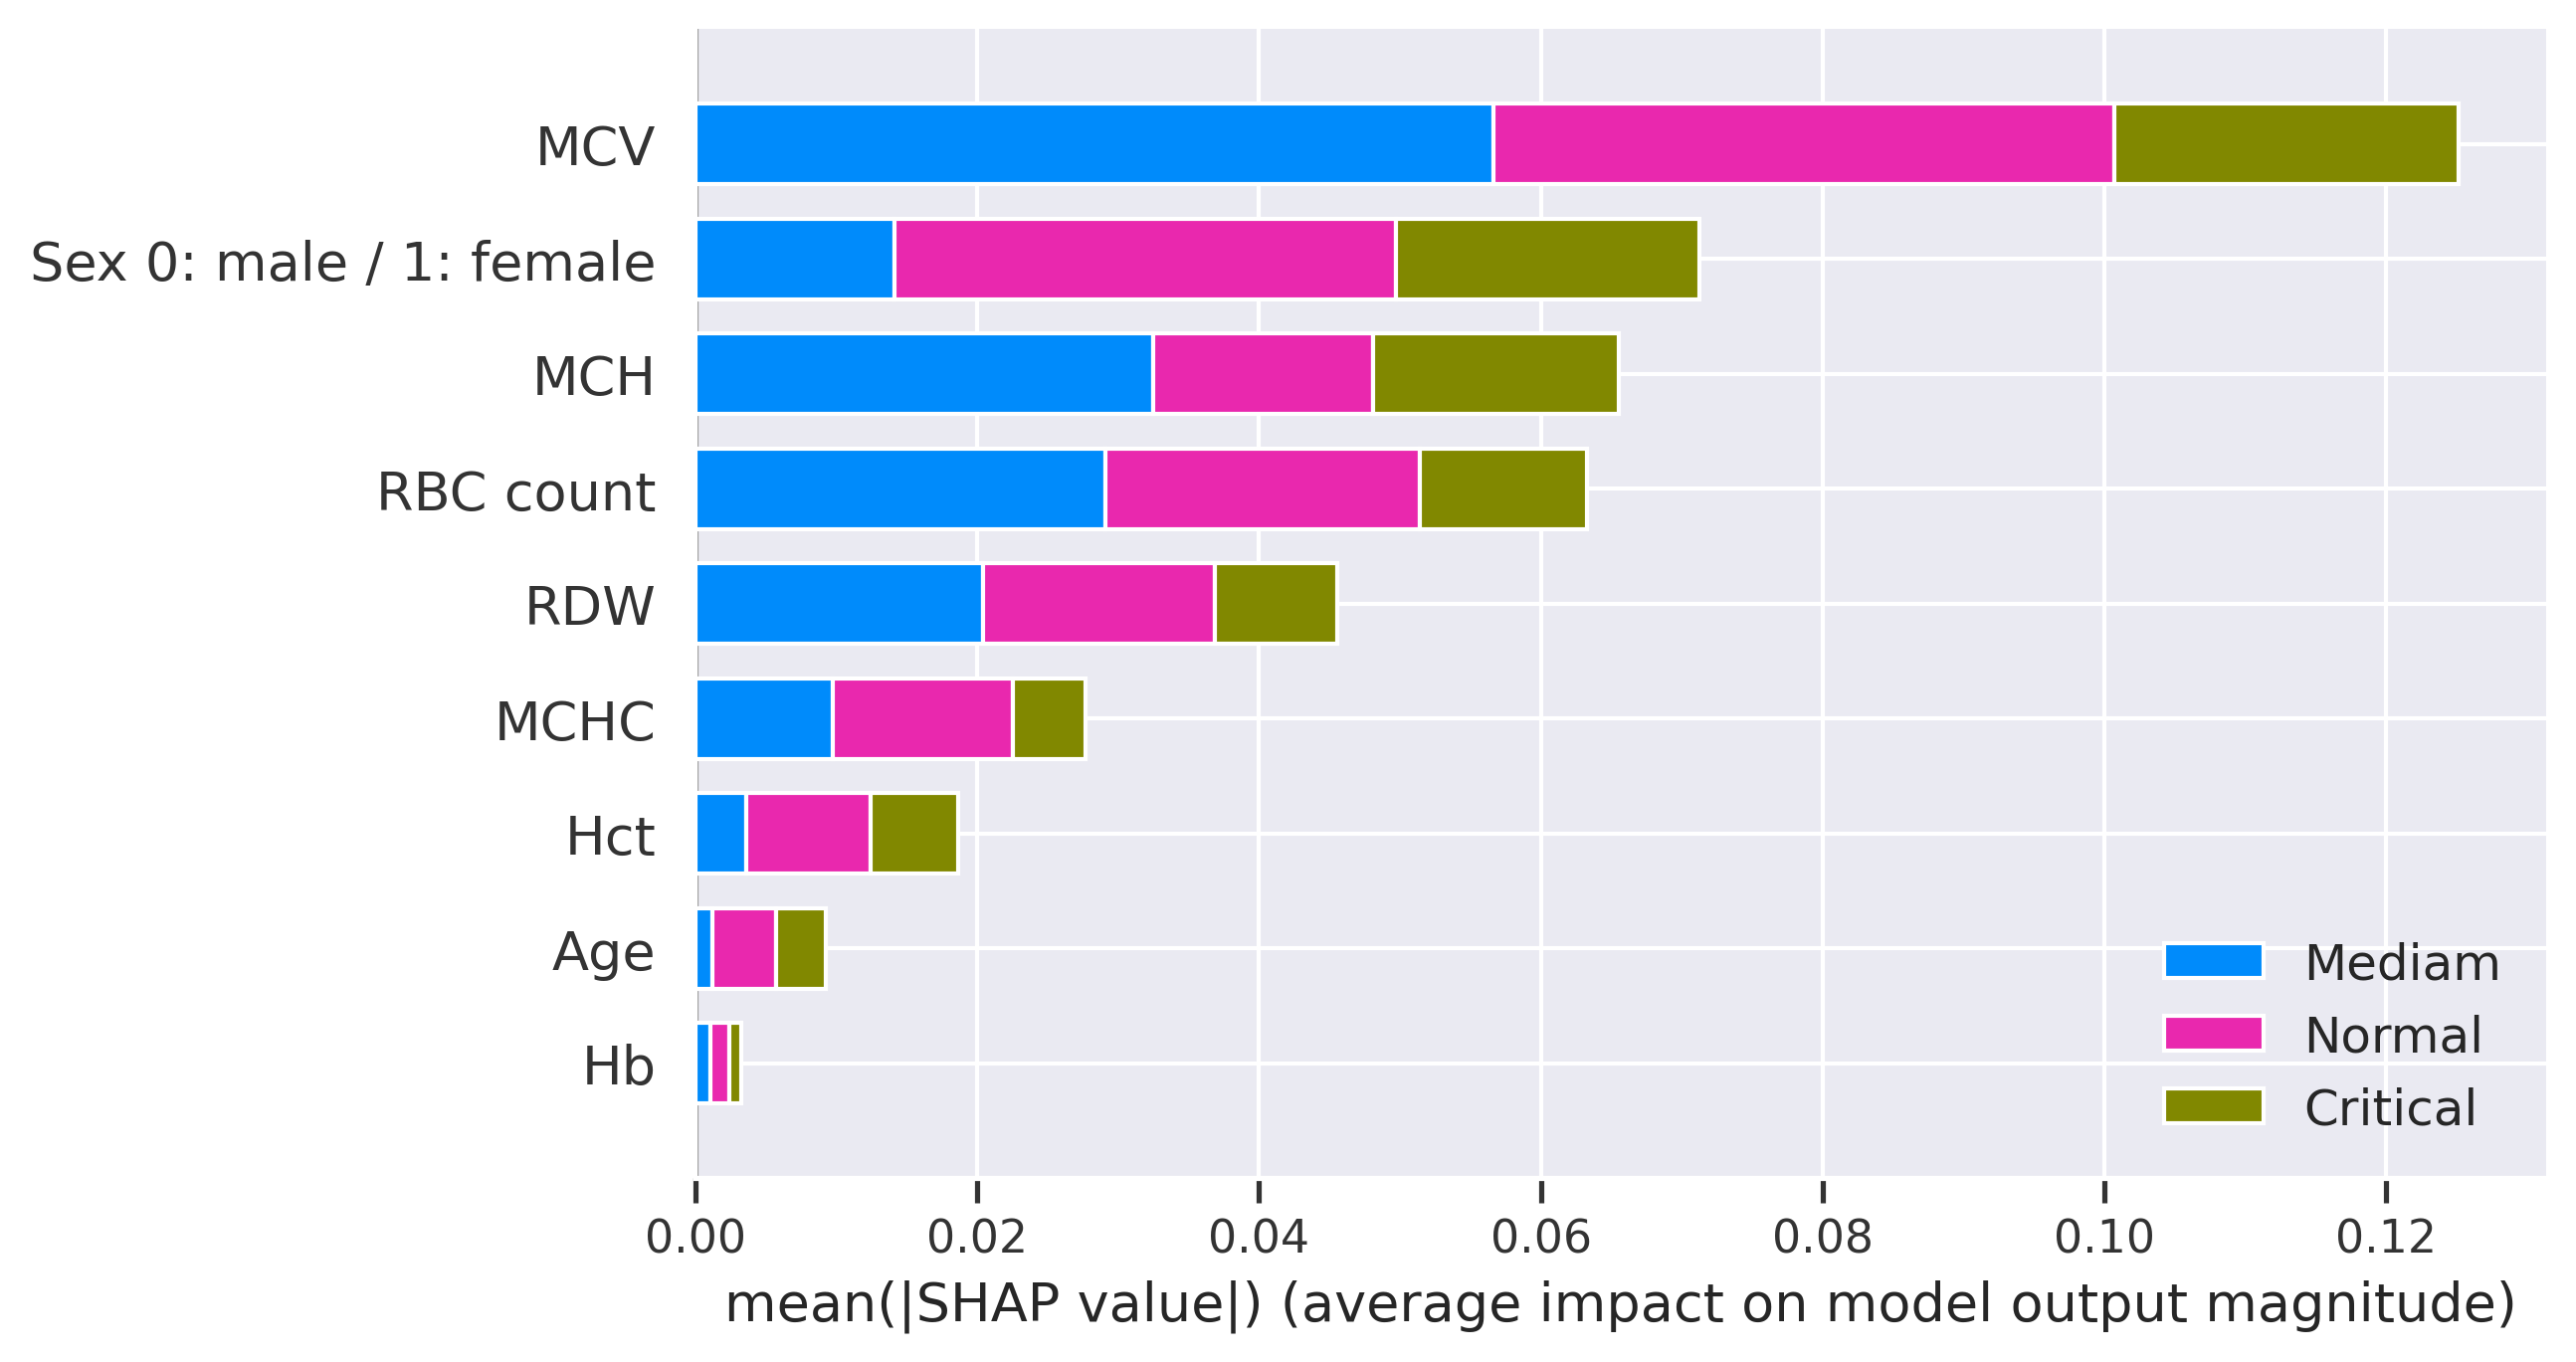

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values, X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=labelname, show=False, )
ax = plt.gca()
fig = plt.gcf()
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

# confusion_matrix

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in (cf/cf.astype(np.float).sum(axis=0)).flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

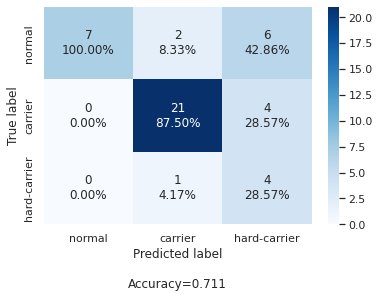

In [38]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yt, yp)
make_confusion_matrix(cf_matrix, cmap='Blues', categories=['normal','carrier','hard-carrier'])

# Ensemble Method! SCV

In [39]:
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 

clf1 = LogisticRegression(random_state=1) 
clf2 = RandomForestClassifier(random_state=1) 
clf3 = SVC(random_state=1, probability=True) 

eclf = VotingClassifier( 
    estimators=[('lr', clf1), 
                ('rf', clf2), 
                ('svm', clf3)], 
    voting='soft') 

params = {#'lr__C': [1.0, 100.0], 
          'rf__n_estimators': [20, 200], 
          'svm__C': [1, 2, 4, 8, 16, 32], 
         } 

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=10) 
grid = grid.fit(X_train_norm,y)

from sklearn.ensemble import VotingClassifier from sklearn.model_selection import GridSearchCV from sklearn.linear_model import LogisticRegression from sklearn.ensemble import RandomForestClassifier from sklearn.svm import SVC clf1 = LogisticRegression(random_state=1) clf2 = RandomForestClassifier(random_state=1) clf3 = SVC(random_state=1, probability=True) eclf = VotingClassifier( estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3)], voting='soft') params = {#'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200], 'svm__C': [1, 2, 4, 8, 16, 32], } grid = GridSearchCV(estimator=eclf, param_grid=params, cv=10) grid = grid.fit(X_train_norm,y)

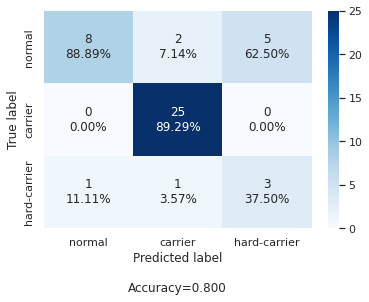

In [40]:
yp = grid.predict(X_test_norm)
cf_matrix = confusion_matrix(yt, yp)
make_confusion_matrix(cf_matrix, cmap='Blues', categories=['normal','carrier','hard-carrier'])

# Save model SVC ลง joblib

In [41]:
import joblib
joblib.dump(grid, "thalmodel.sav")

['thalmodel.sav']